# TUTORIAL: TensorBoard integration

The purpose of this tutorial is to show how it is possible to use TensorBoard extension with VSCode.

## Introduction

**What is TensorBoard?**

"*TensorBoard is TensorFlow's visualization toolkit, enabling you to track metrics like loss and accuracy, visualize the model graph, view histograms of weights, biases, or other tensors as they change over time, and much more. It is an open source tool that is part of the TensorFlow ecosystem.*" 

In this tutorial, you will be able to run TensorBoard in the same notebook as your experience.

But if you want to have a TensorBoard "**up and running**" seperate from the notebook just click the launch tensorboard prompt above any tensorboard magic commands.

Thanks to this visualization toolkit, you will display your metrics as you train your model.


### Remember to load the tensorboard extension

In [2]:
#Load the tensorboard extension

%load_ext tensorboard

# import dependencies
import os
import random

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
import datetime

### Download and prepare your dataset

In [3]:
# load your dataset and split it (here the Fashion MNIST dataset)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# scale images to the [0, 1] range
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

# images must have shape (28,28,1)
X_train = X_train.reshape(-1 ,28 ,28 ,1)
X_test = X_test.reshape(-1 ,28 ,28 ,1)

# display test and train data size
print("X_train shape: ", X_train.shape) # number of train images, size
print("X_test shape: ", X_test.shape)   # number of test images, size
print("y_train shape: ", y_train.shape) # number of train labels (= number of train images)
print("y_test shape: ", y_test.shape)   # number of test labels (= number of test images)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [4]:
# define the labels of the dataset (for the Fashion MNIST dataset, 10 labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Define your model

In [6]:
# parameters
num_classes = len(class_names)
input_shape = (28,28,1)

# build the model
def Model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

# display the model summary
model = Model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Add tensorboard callback and run training

In [8]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# add the TensorBoard callback
log_dir = "runs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir= log_dir,
    histogram_freq=1,
    write_graph=True,
    write_grads=True
    )


# take a subset of images (you don't need to display all of them)
val_images, val_labels = X_test[:32], y_test[:32]

# launch the training
_ = model.fit(X_train, y_train,
              epochs = 10, 
              validation_data = (X_test, y_test),
              callbacks = [tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4942 - accuracy: 0.8214 - val_loss: 0.4479 - val_accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3828 - accuracy: 0.8615 - val_loss: 0.3917 - val_accuracy: 0.8597
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3523 - accuracy: 0.8696 - val_loss: 0.3755 - val_accuracy: 0.8593
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3283 - accuracy: 0.8781 - val_loss: 0.3493 - val_accuracy: 0.8739
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3117 - accuracy: 0.8847 - val_loss: 0.3435 - val_accuracy: 0.8766
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2995 - accuracy: 0.8888 - val_loss: 0.3410 - val_accuracy: 0.8777
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2877 - accuracy: 0.8915 - val_loss: 0.3370 - val_accuracy

### Access to TensorBoard

You can access your results display with the following code. Or click launch tensorboard above the magic command.


In [ ]:
%tensorboard --logdir $log_dir

### Overview of dynamic display with TensorBoard

Thanks to this dynamic display, you can see the **accuracy** and **loss** on the train and validation datasets at each epoch.

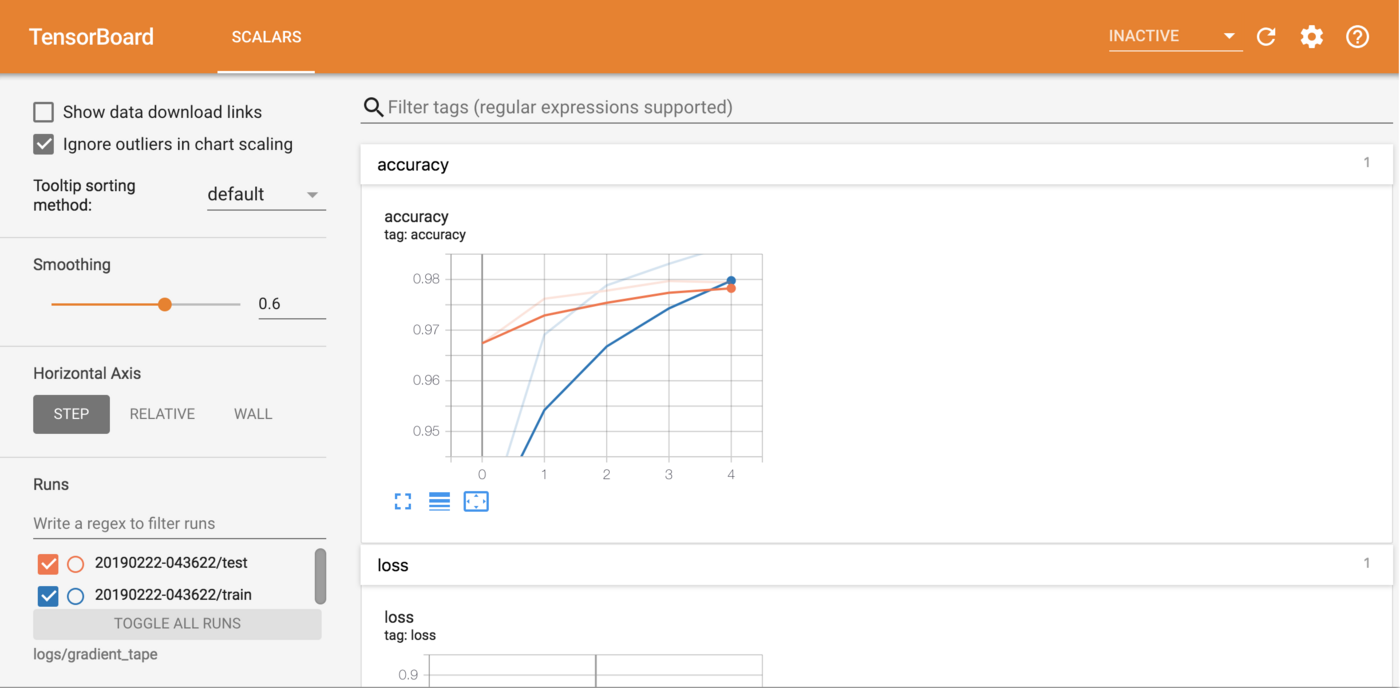


As your data is stored in your object container, you will be able to reuse it and display it again by launching tensorboard.

You can add tensorboard to any of your experiments using the information provided here. Feel free to give it a try.